<a href="https://colab.research.google.com/github/ordevoir/Publish/blob/master/Elementary_Cellular_Automaton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Основные функции

In [3]:
def int_to_bits(n: int) -> np.ndarray:
    """Функция принимает целое число в диапазоне [0, 255].
    Возвращает массив из 8 элементов – двоичное представление числа.
    Младший бит – крайний левый (с индексом 0)"""
    shifts = np.arange(8, dtype=np.uint64)
    return (n >> shifts) & 1

int_to_bits(42)

array([0, 1, 0, 1, 0, 1, 0, 0], dtype=uint64)

In [4]:
def pass_tape_vec(tape: np.ndarray, lut: np.ndarray, iteration: int) -> None:
    """Функция принимает:
    - матрицу tape – временно́й роллаут одномерного автомата;
    - массив lut – двоичное представление правила переходов (младший бит по индексу 0);
    - положительное целое число iteration – номер текущей итерации;
    Функция заполняет ряд itaration+1 на основе ряда iteration по правилу lut.
    """
    row = tape[iteration]
    L = row[:-2]  << 2      # left      старший бит     умножение на 2**2
    C = row[1:-1] << 1      # center                    умножение на 2**1
    R = row[2:] # << 0      # right     младший бит
    lut_codes = L | C | R   # целочисленные коды триплетов (0..7) – сложение

    tape[iteration+1, 1:-1] = lut[lut_codes]   # обновляем внутренние клетки

# Конфигурирование

In [5]:
length = 1001               # длина клеточного автомата
rule = 57                 # правила переходов

n_iterations = length // 2

# определим, в каких позициях будут заданы единичные ячейки автомата
init = np.array([
    length // 2,
    # 2* length // 3 - 100,
    ])

## Случайная конфигурация

In [6]:
# random_values = np.random.randint(0, 2, size=length)
# indices = [i for i in range(len(random_values)) if random_values[i]]
# init = np.array(indices)

# Запуск симуляции

In [7]:
tape = np.zeros((n_iterations+1, length), dtype=np.uint8)
tape[0, init] = 1

lut = int_to_bits(rule)
for i in range(n_iterations):
    pass_tape_vec(tape, lut, i)

# Визуализация

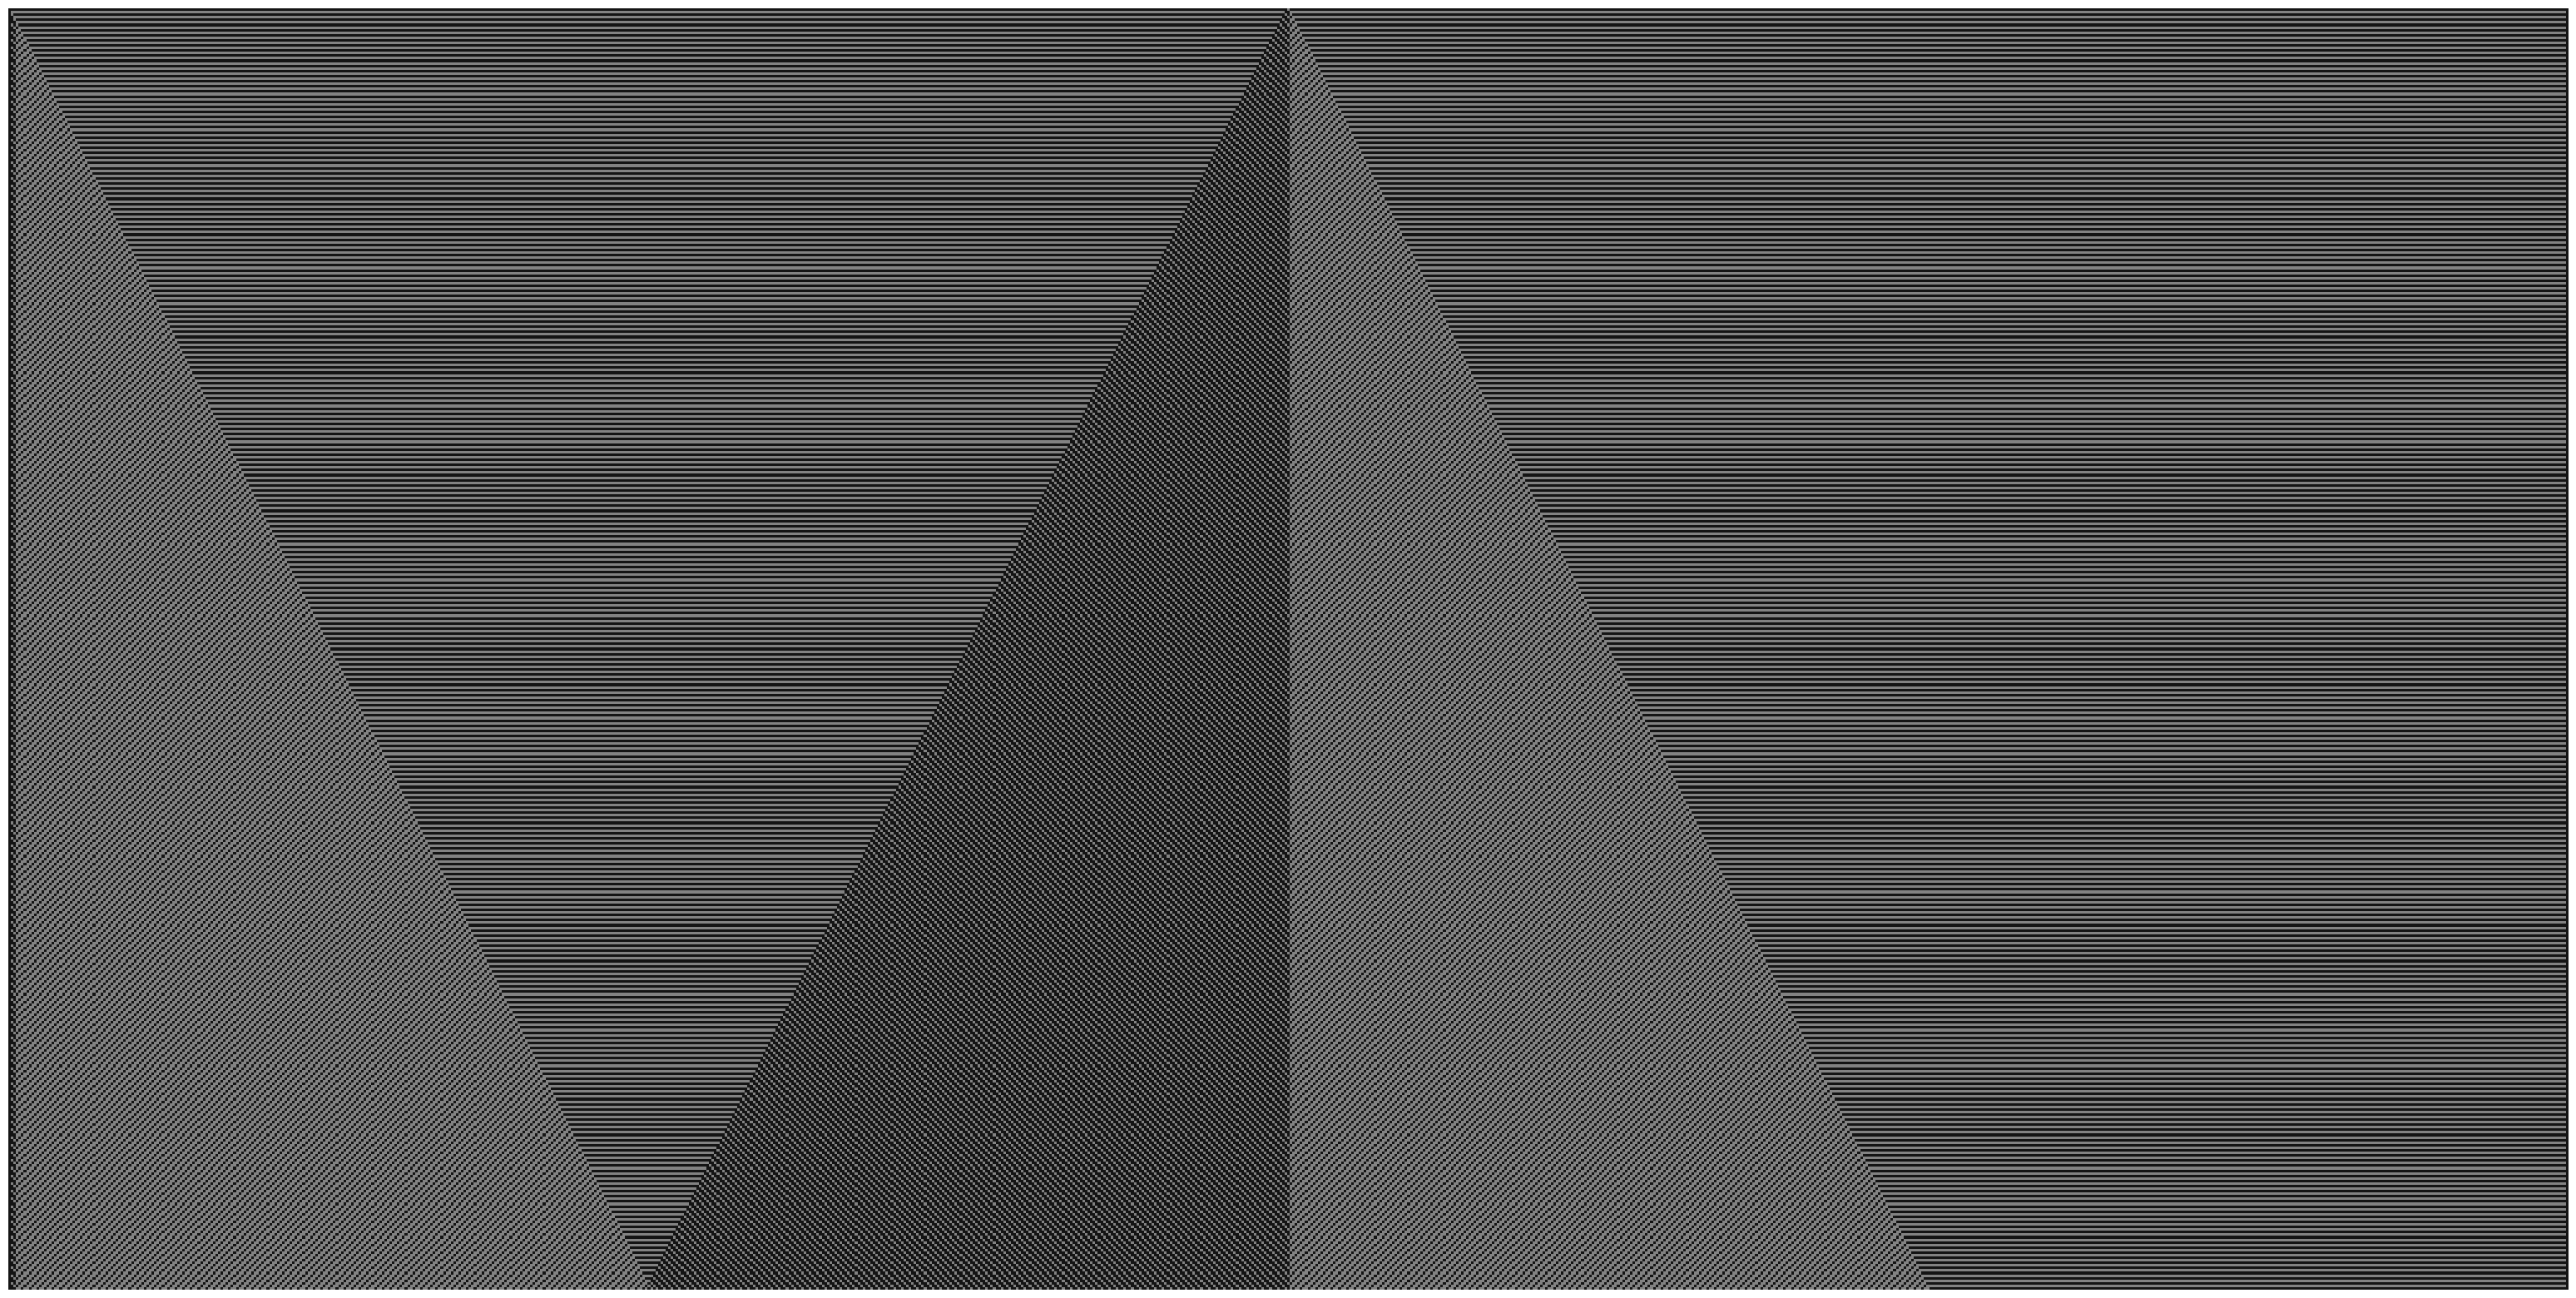

In [9]:
image = tape.copy()

# plt.style.use("ordevoir-dark")

image[image==0] = 20
image[image==1] = 130

plt.figure(figsize=(40, 20))
plt.axis('off')
plt.imshow(image, cmap='gray', vmin=0, vmax=255)

## Визуализация фрагмента

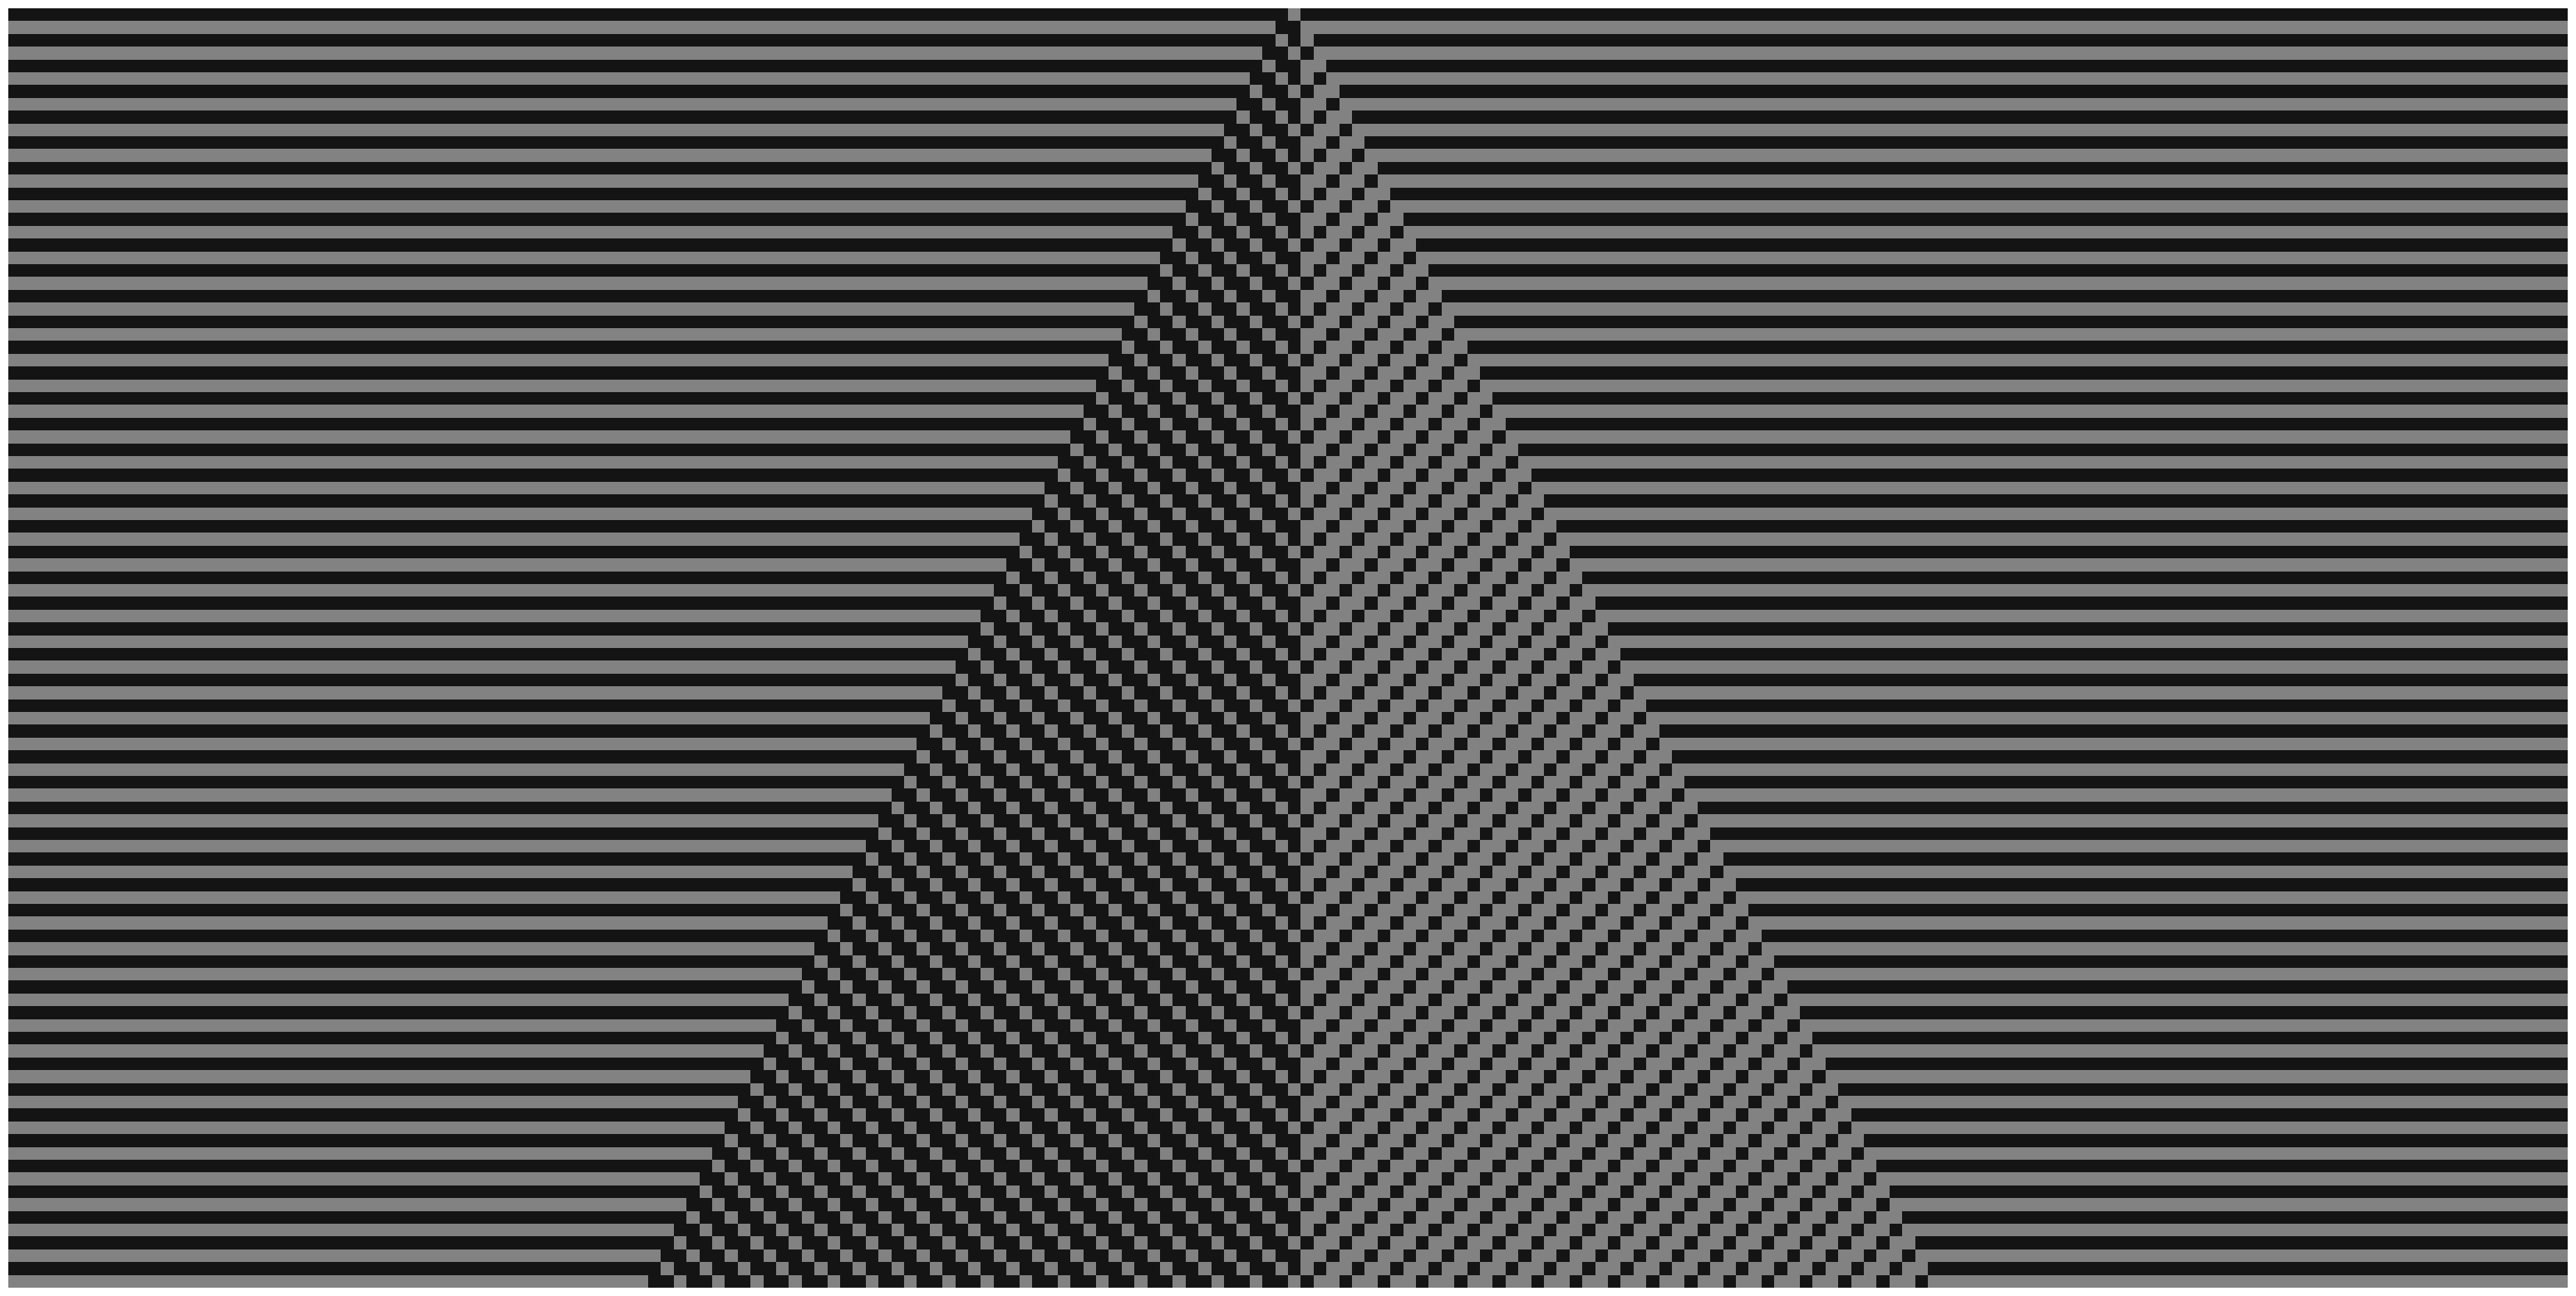

In [10]:
left = length // 2 - 100
right = length // 2 + 100
top = 0
bottom = 100

plt.figure(figsize=(40, 20))
plt.axis('off')
plt.imshow(image[top:bottom, left:right], cmap='gray', vmin=0, vmax=255)

# Сохранение изображения

In [11]:
import uuid
from PIL import Image

image = tape.copy()

image[image==0] = 40
image[image==1] = 100

suffix = uuid.uuid4().hex[:8]
tape_uint8 = image.astype(np.uint8)

img = Image.fromarray(tape_uint8)  # 'L' для grayscale
img.save(f"rule_{rule}_{suffix}.png")